# Melanoma Detection Assignment

### Problem Statement

Build a multiclass classification model using a custom convolutional neural network in TensorFlow. 
A CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution that can evaluate images and alert dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

**Importing Data**

In [13]:
import zipfile as zf
files = zf.ZipFile("CNN_assignment.zip", 'r')
files.extractall('CNN_assignment')
files.close()

**Installing Augmentor Library**

In [ ]:
pip install Augmentor

**Importing Libraries**

In [14]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import keras_cv
from glob import glob
from tensorflow.keras.utils import load_img

In [15]:
train_data = pathlib.Path('CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/')
test_data = pathlib.Path('CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/')

In [16]:
train_img_cnt = len(list(train_data.glob('*/*.jpg')))
print(train_img_cnt)
test_img_cnt = len(list(test_data.glob('*/*.jpg')))
print(test_img_cnt)

2239
118


**Dataset Creation**

**Using 80:20 for training vs test split**

In [17]:
batch_size = 32
image_height = 180
image_width = 180
training_dataset = tf.keras.utils.image_dataset_from_directory(
  train_data,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(image_height, image_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [18]:
batch_size = 32
image_height = 180
image_width = 180
validation_dataset = tf.keras.utils.image_dataset_from_directory(
  test_data,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(image_height, image_width),
  batch_size=batch_size)

Found 118 files belonging to 9 classes.
Using 23 files for validation.


In [19]:
class_names = training_dataset.class_names
class_number = len(class_names)
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


**Data Visualisation**

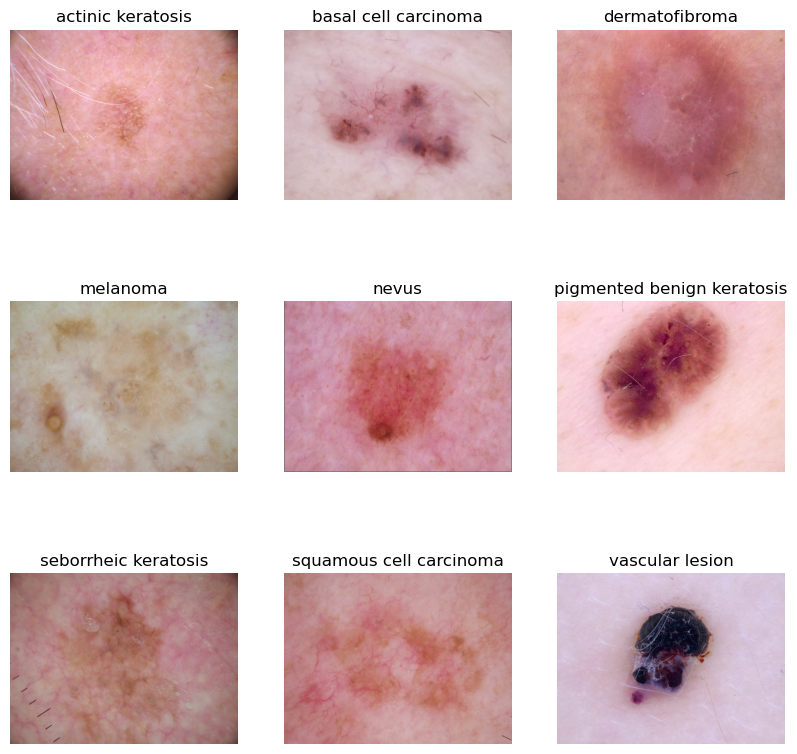

In [20]:
plt.figure(figsize=(10,10))

for lesion_type in range(class_number):
    class_path = glob(os.path.join(train_data, class_names[lesion_type], '*'))
    lesion_images = list(class_path)
    image=PIL.Image.open(str(lesion_images[0]))
    plt.subplot(3,3, lesion_type+1)
    plt.imshow(image)
    plt.title(class_names[lesion_type])
    plt.axis("off")


**Caching the datasets**

In [21]:
# Configure the dataset for performance

AUTOTUNE = tf.data.experimental.AUTOTUNE
training_dataset_cached = training_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_dataset_cached = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

**Model Creation**

In [22]:
# Note the first layer (Rescaling(1./255) rescales the RGB channel values.
image_height = 180
image_width = 180
num_classes = 9

model = tf.keras.Sequential([
  tf.keras.layers.InputLayer(input_shape=(image_height, image_width, 3)),
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

**Model Compilation**

**Using adam optimizer**

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 43, 43, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 41, 41, 32)       

**Model Training**

In [25]:
epochs = 20
history = model.fit(
  training_dataset_cached,
  validation_data=validation_dataset_cached,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 11s 136ms/step - loss: 2.0872 - accuracy: 0.1920 - val_loss: 2.2823 - val_accuracy: 0.0000e+00
Epoch 2/20
56/56 [==============================] - 7s 123ms/step - loss: 1.9105 - accuracy: 0.2874 - val_loss: 2.3833 - val_accuracy: 0.2609
Epoch 3/20
56/56 [==============================] - 7s 127ms/step - loss: 1.7178 - accuracy: 0.3739 - val_loss: 2.5975 - val_accuracy: 0.2609
Epoch 4/20
56/56 [==============================] - 7s 124ms/step - loss: 1.5295 - accuracy: 0.4643 - val_loss: 2.7243 - val_accuracy: 0.3043
Epoch 5/20
56/56 [==============================] - 7s 126ms/step - loss: 1.4220 - accuracy: 0.5061 - val_loss: 2.2141 - val_accuracy: 0.3478
Epoch 6/20
56/56 [==============================] - 7s 125ms/step - loss: 1.3304 - accuracy: 0.5140 - val_loss: 2.3973 - val_accuracy: 0.2609
Epoch 7/20
56/56 [==============================] - 7s 127ms/step - loss: 1.2900 - accuracy: 0.5430 - val_loss: 2.9386 - val_accuracy: 0.2609
E

**Data Visualization on training results**

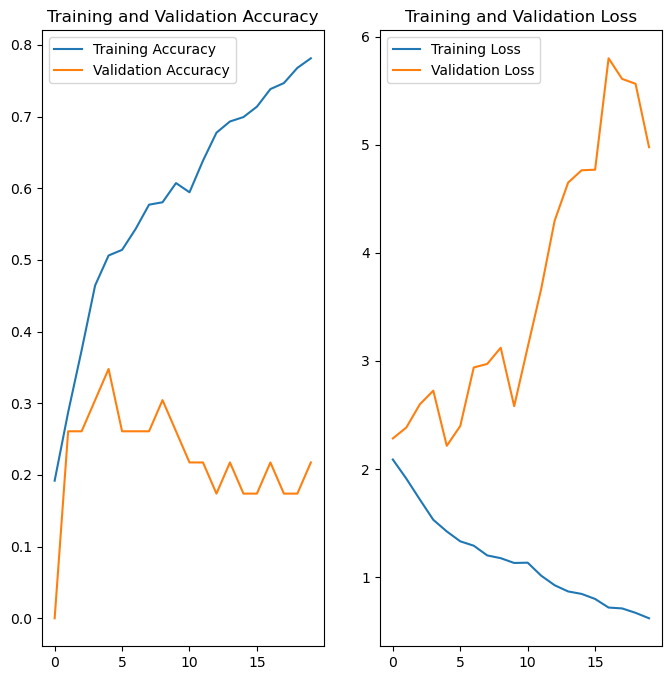

In [26]:
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper left')
plt.title('Training and Validation Loss')
plt.show()

**Observations**

**We can see signs of overfitting. This means the model is too focused on the training data and doesn't perform well on new, unseen data. We can tell because the difference between how well it does on the training data compared to new data is more than 0.5. Also, if you look at the graphs, you'll notice that as the model learns more from the training data, it gets better at predicting on that data (training loss decreases), but it gets worse at predicting on new data (validation loss increases).**

**Data Augmentation**

In [27]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.5),
    layers.RandomContrast(0.5),
    layers.RandomBrightness(0.3),
    keras_cv.layers.RandomColorDegeneration(0.5)
])

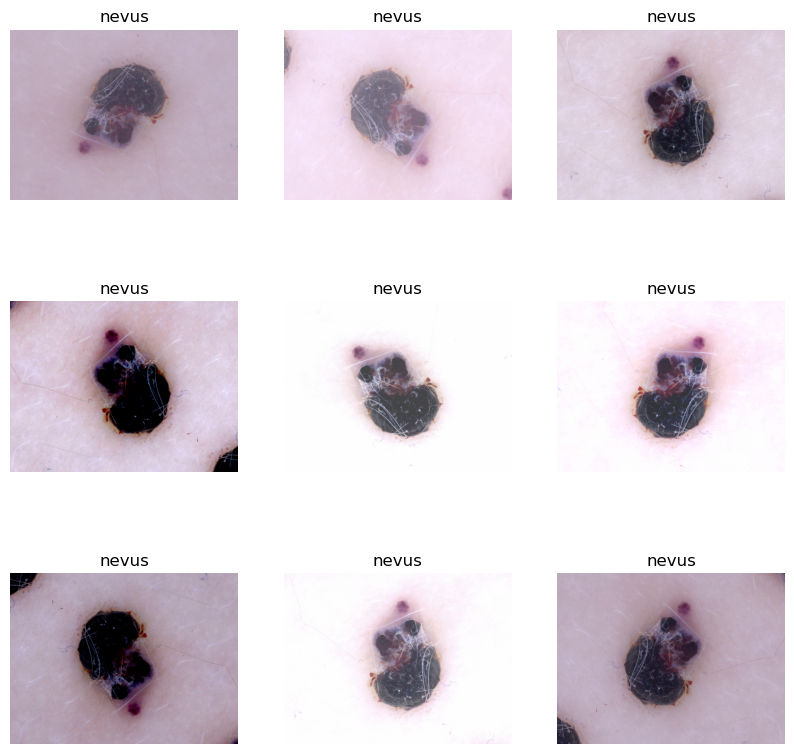

In [31]:
plt.figure(figsize=(10, 10))

for images, labels in training_dataset_cached.take(1):
  for i in range(9):
    augmented_image = data_augmentation(image)
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image.numpy().astype("uint8"))
    plt.title(class_names[labels[1]])
    plt.axis("off")

**Model Creation with Augmentation and Dropout layers**

In [32]:
dropout_conv=0.05
dropout_dense=0.25
image_height = 180
image_width = 180
model_aug_drop = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(image_height, image_width, 3)),
    data_augmentation,
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(dropout_conv),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),  
    tf.keras.layers.Dropout(dropout_conv),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(dropout_conv),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(dropout_dense),
    tf.keras.layers.Dense(num_classes)
])

**Model Compilation**

In [33]:
model_aug_drop.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Model Training**

In [34]:
epochs = 20 # As specified in the project pipeline
history = model_aug_drop.fit(
  training_dataset_cached,
  validation_data = validation_dataset_cached,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 10s 161ms/step - loss: 2.0983 - accuracy: 0.1903 - val_loss: 2.2697 - val_accuracy: 0.1739
Epoch 2/20
56/56 [==============================] - 9s 159ms/step - loss: 2.0384 - accuracy: 0.2121 - val_loss: 2.2895 - val_accuracy: 0.2174
Epoch 3/20
56/56 [==============================] - 9s 160ms/step - loss: 1.9086 - accuracy: 0.2885 - val_loss: 2.1167 - val_accuracy: 0.2609
Epoch 4/20
56/56 [==============================] - 9s 159ms/step - loss: 1.8195 - accuracy: 0.3359 - val_loss: 2.3116 - val_accuracy: 0.2609
Epoch 5/20
56/56 [==============================] - 9s 159ms/step - loss: 1.6884 - accuracy: 0.4040 - val_loss: 2.5348 - val_accuracy: 0.3043
Epoch 6/20
56/56 [==============================] - 9s 157ms/step - loss: 1.6835 - accuracy: 0.4196 - val_loss: 2.2899 - val_accuracy: 0.2609
Epoch 7/20
56/56 [==============================] - 9s 156ms/step - loss: 1.6751 - accuracy: 0.4029 - val_loss: 2.6366 - val_accuracy: 0.2174
Epoch

**Visualization on training results**

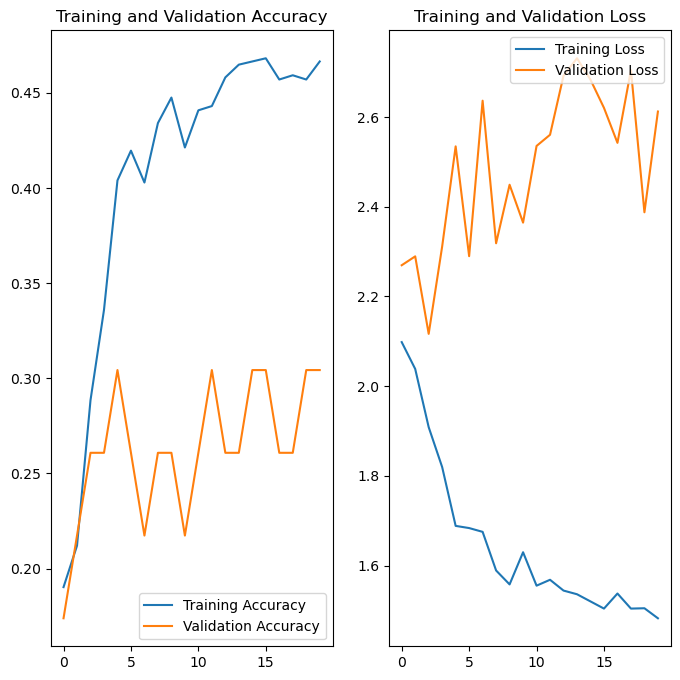

In [35]:
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Sample Distribution on Class Labels**

In [36]:
dataset_unbatched = tuple(training_dataset.unbatch())
labels = []
for (image,label) in dataset_unbatched:
    labels.append(label.numpy())
labels = pd.Series(labels)

# adjustments
count = labels.value_counts().sort_index()
count.index = training_dataset.class_names
print(count)

actinic keratosis              92
basal cell carcinoma          309
dermatofibroma                 77
melanoma                      352
nevus                         277
pigmented benign keratosis    370
seborrheic keratosis           58
squamous cell carcinoma       142
vascular lesion               115
dtype: int64


**Question :**

**Which class has the least number of samples?**

**Answer :**

**Seborrheic keratosis has the least number of samples at 2039**

**Question :**

**Which classes dominate the data in terms proportionate number of samples?**

**Answer :**

**Melanoma and pigmented benign keratosis dominate the data in terms of proportionate number of samples**


In [37]:
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(str(train_data) + '/' + str(i))
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)

Initialised with 114 image(s) found.
Output directory set to CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2C493D2D0>: 100%|█|


Initialised with 376 image(s) found.
Output directory set to CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2C49861D0>: 100%|█|


Initialised with 95 image(s) found.
Output directory set to CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x2


Initialised with 438 image(s) found.
Output directory set to CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x2C4E083D0>: 100%|█


Initialised with 357 image(s) found.
Output directory set to CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x2C4DFDA20>: 100%|█|


Initialised with 462 image(s) found.
Output directory set to CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2C4995690>: 100%|█|


Initialised with 77 image(s) found.
Output directory set to CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x2C4E4B670>: 100%|█


Initialised with 181 image(s) found.
Output directory set to CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2C49D5A20>: 100%|█|


Initialised with 139 image(s) found.
Output directory set to CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x2


In [38]:
train_img_cnt = len(list(train_data.glob('*/output/*.jpg')))
print(train_img_cnt)

4500


**Training dataset creation**

In [39]:
batch_size = 32
image_height = 180
image_width = 180
training_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  train_data,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(image_height, image_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


**Validation dataset creation**

In [40]:
batch_size = 32
image_height = 180
image_width = 180
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  train_data,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(image_height, image_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


**Model Building**

In [41]:
num_classes = 9

model3 = tf.keras.Sequential([
  tf.keras.layers.InputLayer(input_shape=(image_height, image_width, 3)),
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

#### Model Compilation

In [42]:
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Model Training**

In [43]:
epochs = 20
history = model3.fit(
  training_dataset,
  validation_data=validation_dataset,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 26s 150ms/step - loss: 1.7551 - accuracy: 0.3310 - val_loss: 1.4670 - val_accuracy: 0.4529
Epoch 2/20
169/169 [==============================] - 26s 150ms/step - loss: 1.4188 - accuracy: 0.4701 - val_loss: 1.3717 - val_accuracy: 0.5056
Epoch 3/20
169/169 [==============================] - 26s 149ms/step - loss: 1.2563 - accuracy: 0.5415 - val_loss: 1.3176 - val_accuracy: 0.5316
Epoch 4/20
169/169 [==============================] - 26s 151ms/step - loss: 1.0900 - accuracy: 0.6029 - val_loss: 1.1503 - val_accuracy: 0.5865
Epoch 5/20
169/169 [==============================] - 26s 151ms/step - loss: 0.9375 - accuracy: 0.6571 - val_loss: 1.0862 - val_accuracy: 0.6080
Epoch 6/20
169/169 [==============================] - 26s 151ms/step - loss: 0.7892 - accuracy: 0.7142 - val_loss: 1.0058 - val_accuracy: 0.6704
Epoch 7/20
169/169 [==============================] - 26s 152ms/step - loss: 0.6646 - accuracy: 0.7602 - val_loss: 0.9310 - val_ac

**Data Visualisation on Model Results**

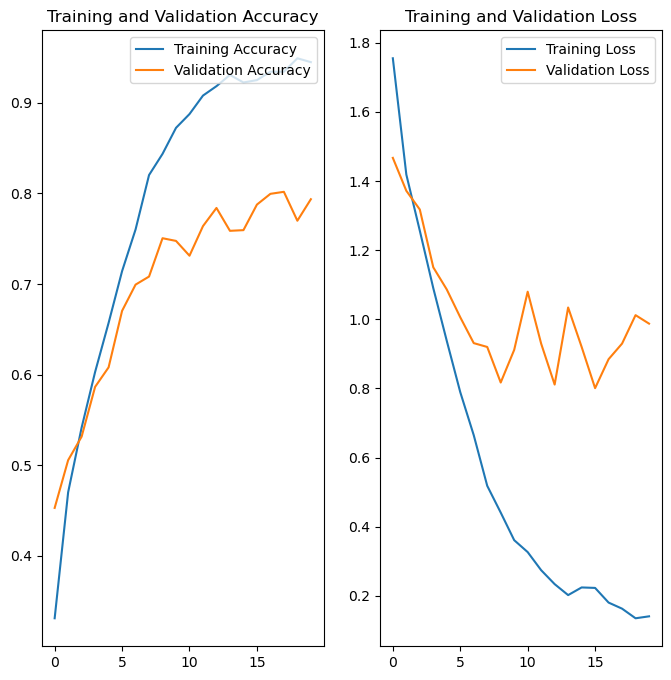

In [44]:
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Findings**

**The new method of using more data has greatly improved our results compared to before. After 20 epochs model correctly identified 94.49% of the training data and 79.36% of the new data. However, because the error rate in the new data is fluctuating, we can try training again but gradually slowing down how fast the model learns.**